In [1]:
import numpy
from PIL import Image

In [2]:
## Einops
import numpy as np

from PIL.Image import fromarray
from IPython import get_ipython


def display_np_arrays_as_images():
    def np_to_png(a):
        if 2 <= len(a.shape) <= 3:
            return fromarray(np.array(np.clip(a, 0, 1) * 255, dtype='uint8'))._repr_png_()
        else:
            return fromarray(np.zeros([1, 1], dtype='uint8'))._repr_png_()

    def np_to_text(obj, p, cycle):
        if len(obj.shape) < 2:
            print(repr(obj))
        if 2 <= len(obj.shape) <= 3:
            pass
        else:
            print('<array of shape {}>'.format(obj.shape))

    get_ipython().display_formatter.formatters['image/png'].for_type(np.ndarray, np_to_png)
    get_ipython().display_formatter.formatters['text/plain'].for_type(np.ndarray, np_to_text)


from IPython.display import display_html

_style_inline = """<style>
.einops-answer {
    color: transparent;
    padding: 5px 15px;
    background-color: #def;
}
.einops-answer:hover { color: blue; } 
</style>
"""


def guess(x):
    display_html(
        _style_inline
        + "<h4>Answer is: <span class='einops-answer'>{x}</span> (hover to see)</h4>".format(x=tuple(x)),
        raw=True)
        
import einops
import numpy as np
from PIL import Image
display_np_arrays_as_images()

In [3]:
import glob
filelist = glob.glob('../../lfw/lfw-deepfunneled/lfw-deepfunneled/Angela_Bassett/*.jpg')

In [4]:
all_images = (np.array([np.array(Image.open(fname)) for fname in filelist]))/255

In [5]:
print(all_images.shape, all_images.dtype)

(6, 250, 250, 3) float64


In [6]:
import os

In [8]:
wb_name = "run_2"
path = "../results/"+wb_name+"/"
os.mkdir(path)

In [16]:
all_images.dump((path+"images_2.npy"))

In [ ]:
all_images[]

In [96]:
from einops import rearrange, reduce, repeat

In [186]:
tr = rearrange(all_images[0], '(h1 h2) (w1 w2) c -> (h1 w2) (w1 h2) c', h2=25, w2=25)

In [194]:
x_p = rearrange(all_images[0], '(h p1) (w p2) c -> (h w) (p1 p2) c', p1 = 50, p2 = 50)

In [ ]:
5*5*(50*50)*3

In [123]:
x_p.shape

(25, 2500, 3)

In [210]:
x_p[0:1,:,:].shape

(1, 2500, 3)

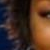

In [207]:
x_p[11,:,:].reshape(50,50,3)

In [ ]:
image = rearrange(all_images[0], 'b (c h w) -> b c (h w)', h=4, w=4)

# Assign each patch a value between 0 and 15
for i in range(16):
    image[:, i] += i

# Reshape the patches back into a single image
reassembled_image = einops.rearrange(image, 'b c (h w) -> b (c h w)', h=4, w=4)